Importing Dependencies

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import re

Data Collection and Analysis

In [4]:
#Inintialising and displaying the UCI dataset 
df = pd.read_csv('parkinsons.csv')
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [5]:
df.shape

(195, 24)

In [6]:
#Checking for null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
#Checking for invalid values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
#Drop rows with missing values
df = df.dropna()

In [9]:
#Checking for duplicate values 
duplicateCount = df.duplicated().sum()
print("Number of duplicate rows: ", duplicateCount)

Number of duplicate rows:  0


In [10]:
#Checking target varible distribution
print(df['status'].value_counts())

status
1    147
0     48
Name: count, dtype: int64


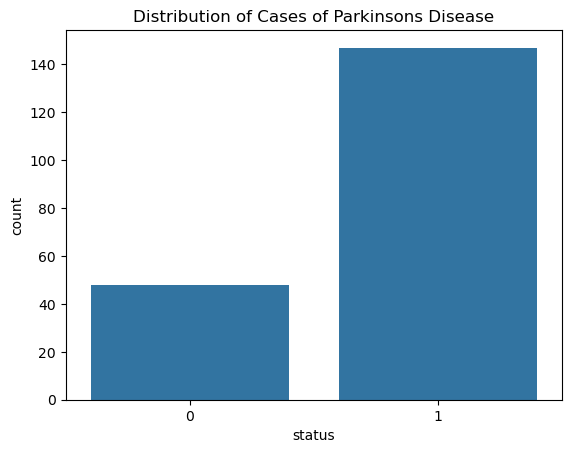

In [11]:
#Visualisation of distribution through bar chart
sns.countplot(x=df['status'])
plt.title("Distribution of Cases of Parkinsons Disease")
plt.show()

In [12]:
#Setting x and y variables
x = df.drop(['status', 'name'], axis=1)
y = df['status']

In [13]:
#Shows first 5 x values 
x.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 22 columns]

In [14]:
#Shows first 5 y values 
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [15]:
# Split dataset into train and test sets with an 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
#Balancing the dataset using SMOTE and RandomOverSampler methods
def balance_data(method, x_train, y_train):
    # Applying RandomOverSampler and SMOTE resampling method
    if method == "RandomOverSampler":
        sampler = RandomOverSampler(random_state=42)
    elif method == "SMOTE":
        sampler = SMOTE(random_state=42)
    else:
        raise ValueError("Invalid method, please choose 'RandomOverSampler' or 'SMOTE'.")
        
    x_resampled, y_resampled = sampler.fit_resample(x_train, y_train) # No modification of x_test, y_test
    return x_resampled, y_resampled

# Applying both methods 
x_smote, y_smote = balance_data("SMOTE", x_train, y_train)
x_ros, y_ros = balance_data("RandomOverSampler", x_train, y_train)

Model Development and Evaluation 

In [18]:
#def evaluate_model(x, y, method, model_name):

    #x_resampled, y_resampled = sampler.fit_resample(x_train, y_train)
    
    # Initialising the chosen models
    #if model_name == "Random Forest":
        #model = RandomForestClassifier(random_state=42)
    #elif model_name == "SVM":
        #model = SVC(kernel='linear', random_state=42)  # Linear kernel for simplicity
    #elif model_name == "KNN":
        #model = KNeighborsClassifier(n_neighbors=5)  # Default 5 neighbors
    #else:
        #raise ValueError("Invalid model, please choose 'Random Forest', 'SVM', or 'KNN'.")

    # Training the model
    #model.fit(x_resampled, y_resampled)

    # Make predictions
    #y_pred = model.predict(x_test)

    # Evaluate the performance
    #data_accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred)

    #return data_accuracy, precision, recall, f1


In [19]:
#methods = ["RandomOverSampler", "SMOTE"]

#results = {}

#for method in methods:
    #for model in models:
        #results[(method, model)] = evaluate_model(x, y, method, model)

# Converting results to DataFrame for better visualisation
#results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
#results_df.columns = ["Accuracy", "Precision", "Recall", "F1-score"]

# Displaying comparison of the results
#print(results_df)


Results for Random Forest before data balancing:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



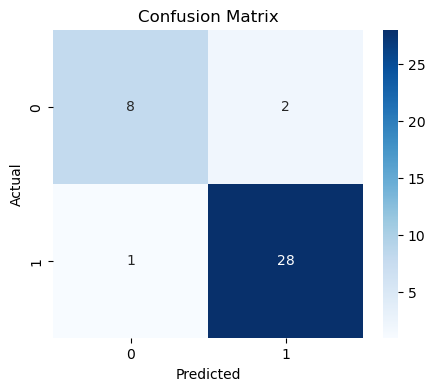

Cross-Validation Accuracy: 0.8980 ± 0.0535

Results for SVM before data balancing:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39



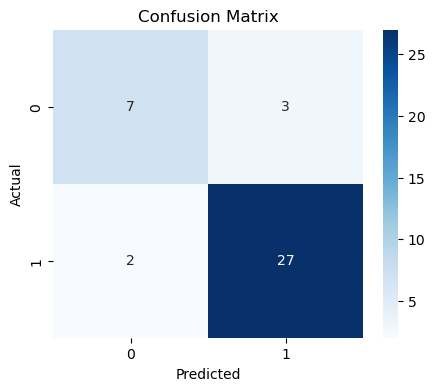

Cross-Validation Accuracy: 0.8526 ± 0.0630

Results for Decision Tree before data balancing:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



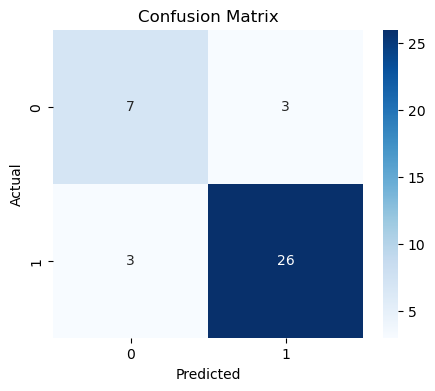

Cross-Validation Accuracy: 0.8724 ± 0.0515

Results for XGBoost before data balancing:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



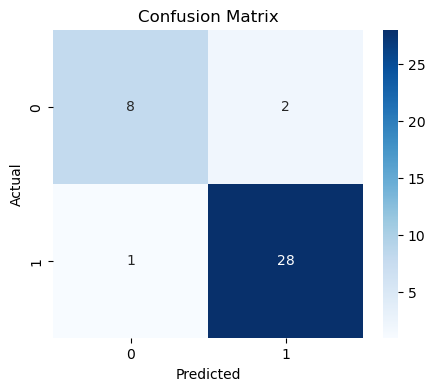

Cross-Validation Accuracy: 0.9105 ± 0.0468

---- Evaluating Models with RandomOverSampler ----

Results with RandomOverSampler and Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



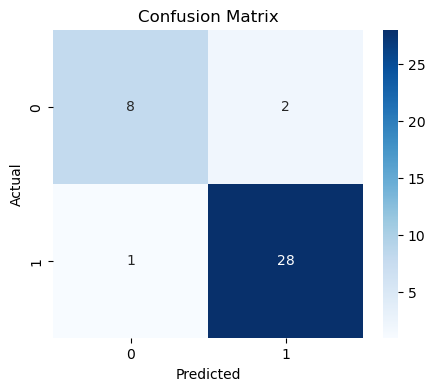

Cross-Validation Accuracy: 0.9494 ± 0.0280

Results with RandomOverSampler and SVM:
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.92      0.76      0.83        29

    accuracy                           0.77        39
   macro avg       0.72      0.78      0.74        39
weighted avg       0.82      0.77      0.78        39



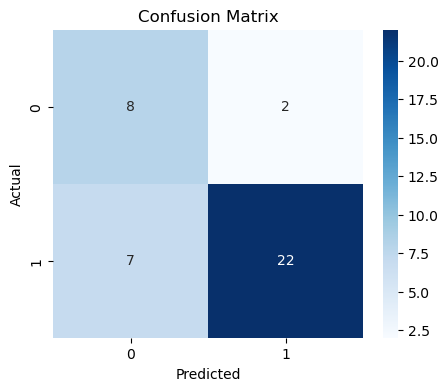

Cross-Validation Accuracy: 0.8349 ± 0.0355

Results with RandomOverSampler and Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



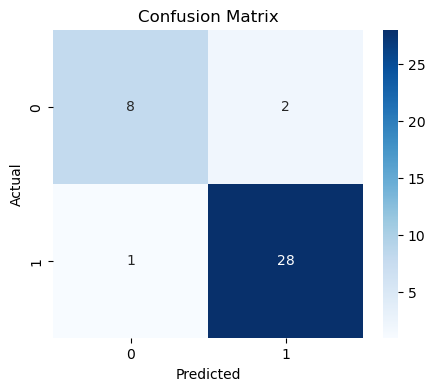

Cross-Validation Accuracy: 0.9324 ± 0.0486

Results with RandomOverSampler and XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



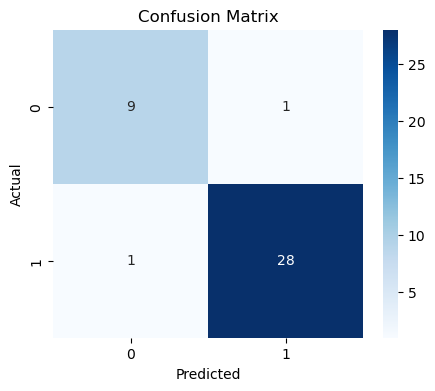

Cross-Validation Accuracy: 0.9621 ± 0.0358

---- Evaluating Models with SMOTE ----

Results with SMOTE and Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



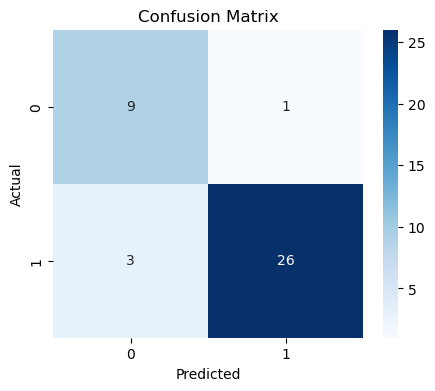

Cross-Validation Accuracy: 0.9411 ± 0.0564

Results with SMOTE and SVM:
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.92      0.76      0.83        29

    accuracy                           0.77        39
   macro avg       0.72      0.78      0.74        39
weighted avg       0.82      0.77      0.78        39



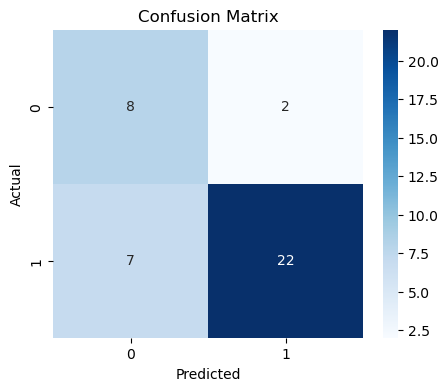

Cross-Validation Accuracy: 0.8392 ± 0.0273

Results with SMOTE and Decision Tree:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.86      0.86      0.86        29

    accuracy                           0.79        39
   macro avg       0.73      0.73      0.73        39
weighted avg       0.79      0.79      0.79        39



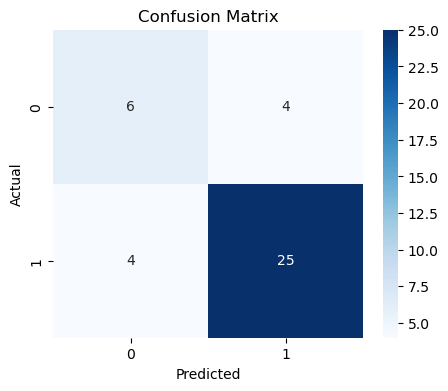

Cross-Validation Accuracy: 0.9070 ± 0.0386

Results with SMOTE and XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



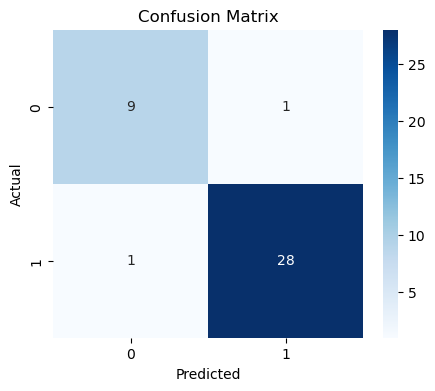

Cross-Validation Accuracy: 0.9578 ± 0.0227


In [20]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Implementing classification report for both classes
    report = classification_report(y_test, y_pred)
    print(report)

    # Extract accuracy manually from report
    accuracy_match = re.search(r'accuracy\s+([\d.]+)', report)
    accuracy = float(accuracy_match.group(1)) if accuracy_match else None

    # Extract precision, recall, and f1-score for "macro avg"
    macro_avg_match = re.search(r'macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)', report)
    if macro_avg_match:
        precision = float(macro_avg_match.group(1))
        recall = float(macro_avg_match.group(2))
        f1_score = float(macro_avg_match.group(3))
    else:
        precision, recall, f1_score = None, None, None  # Default values if parsing fails
        
    # Confusion matrix visualisation to interpret results
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Cross-validation score fo ensuring credibility
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Return metrics
    #return accuracy_score(y_test, y_pred)
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

# Initialising models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, verbosity=0, random_state=42)

}

# Dictionary to store results
results = {"Model": [], "Balancing Method": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# Dictionary to store model performance
performance_dict = {
    "No Balancing": {},
    "RandomOverSampler": {},
    "SMOTE": {}
}

# Evaluate models on imbalanced datasets
for model_name, model in models.items():
    print(f"\nResults for {model_name} before data balancing:")
    performance_metrics = evaluate_model(model, x_train, y_train, x_test, y_test)
    performance_dict["No Balancing"][model_name] = performance_metrics

# Evaluate models on both balanced datasets
for method, (x_resampled, y_resampled) in {
    "RandomOverSampler": (x_ros, y_ros),
    "SMOTE": (x_smote, y_smote)
}.items():
    print(f"\n---- Evaluating Models with {method} ----")
    
    for model_name, model in models.items():
        print(f"\nResults with {method} and {model_name}:")
        performance_metrics = evaluate_model(model, x_resampled, y_resampled, x_test, y_test)
        performance_dict[method][model_name] = performance_metrics

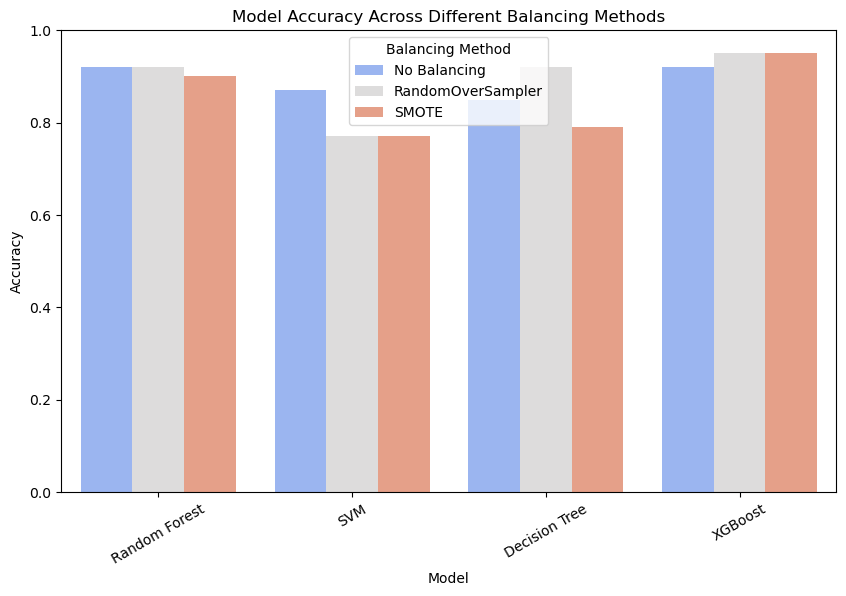

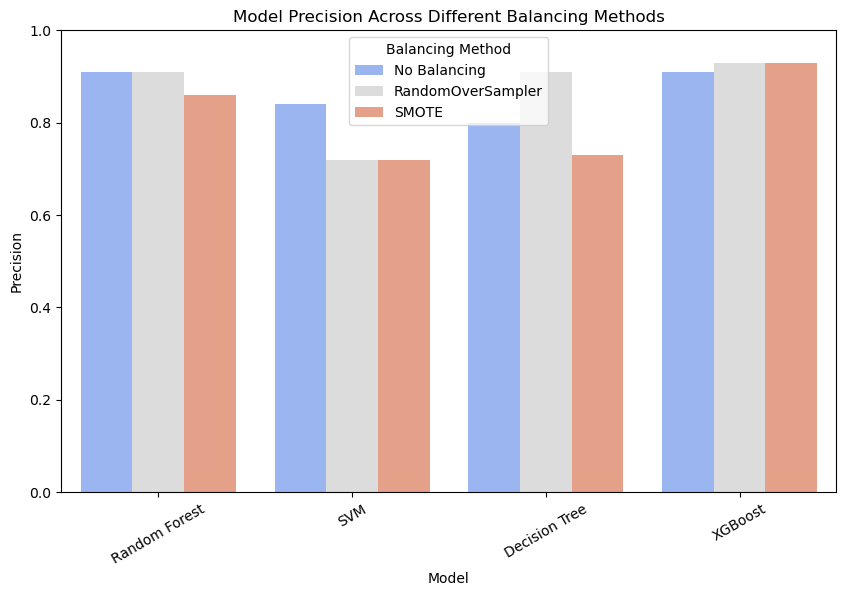

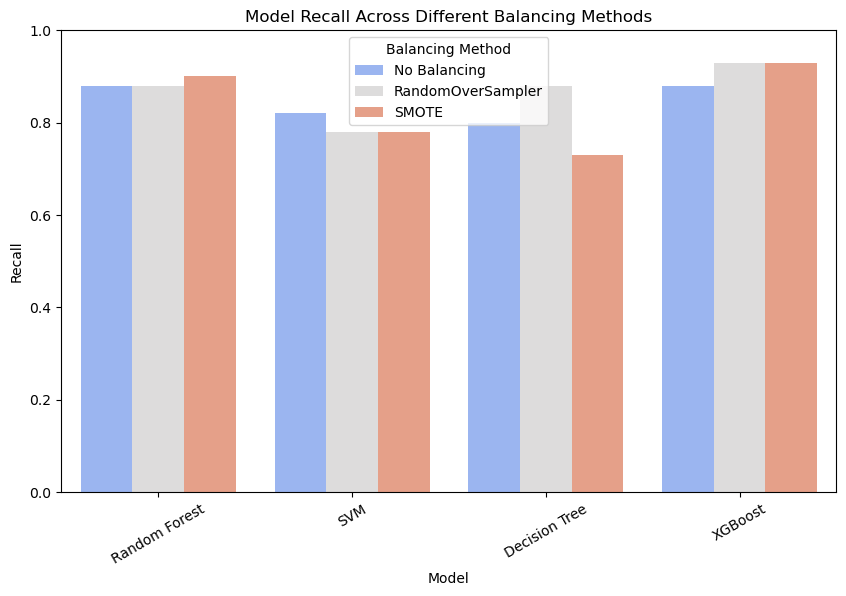

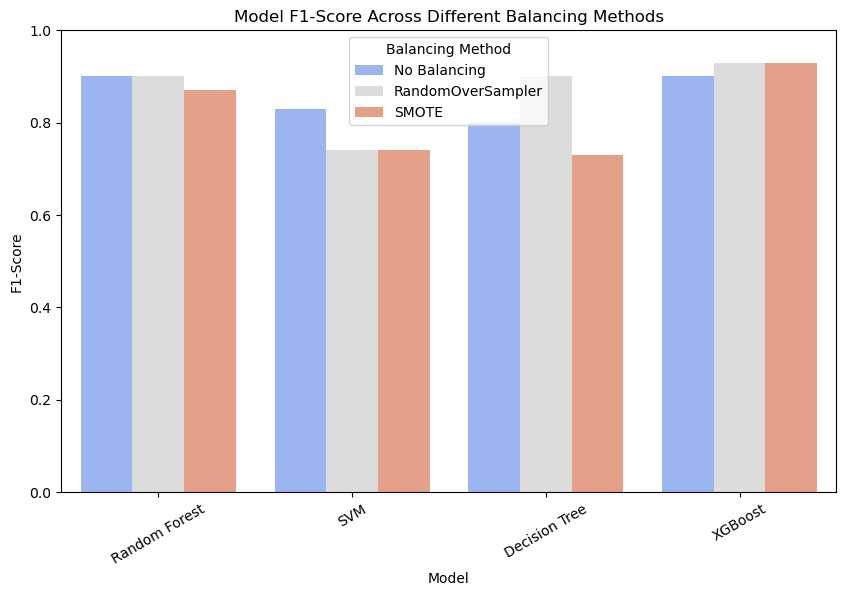

In [21]:
#Visual representation of results
df_performance = pd.DataFrame(performance_dict).stack().reset_index()
df_performance.columns = ["Model", "Balancing Method", "Metrics"]

# Convert metrics dictionary into separate columns
df_performance = df_performance.join(pd.json_normalize(df_performance["Metrics"]))
df_performance.drop(columns=["Metrics"], inplace=True) 
# List of performance metrics to visualise
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Create bar charts for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, hue="Balancing Method", data=df_performance, palette="coolwarm")

    # Customise plot
    plt.title(f"Model {metric} Across Different Balancing Methods")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0, 1)
    plt.legend(title="Balancing Method")
    plt.xticks(rotation=30)

    # Show plot
    plt.show()